In [35]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [36]:
# 1. Dataset 확인
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
df_train.shape

(891, 12)

In [39]:
df_train.describe()  # Age 결측치 존재 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
df_test.shape

(418, 11)

In [40]:
df_test.describe() # 역시 결측치 주의

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
# 1.1 결측치 check
for col in df_train.columns:     # .columns는 이름 반환
    msg = 'col: {: >10}\t % of NaN: {: .2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

col: PassengerId	 % of NaN:  0.00%
col:   Survived	 % of NaN:  0.00%
col:     Pclass	 % of NaN:  0.00%
col:       Name	 % of NaN:  0.00%
col:        Sex	 % of NaN:  0.00%
col:        Age	 % of NaN:  19.87%
col:      SibSp	 % of NaN:  0.00%
col:      Parch	 % of NaN:  0.00%
col:     Ticket	 % of NaN:  0.00%
col:       Fare	 % of NaN:  0.00%
col:      Cabin	 % of NaN:  77.10%
col:   Embarked	 % of NaN:  0.22%


In [45]:
for col in df_test.columns:     # .columns는 이름 반환
    msg = 'col: {: >10}\t % of NaN: {: .2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

col: PassengerId	 % of NaN:  0.00%
col:     Pclass	 % of NaN:  0.00%
col:       Name	 % of NaN:  0.00%
col:        Sex	 % of NaN:  0.00%
col:        Age	 % of NaN:  20.57%
col:      SibSp	 % of NaN:  0.00%
col:      Parch	 % of NaN:  0.00%
col:     Ticket	 % of NaN:  0.00%
col:       Fare	 % of NaN:  0.24%
col:      Cabin	 % of NaN:  78.23%
col:   Embarked	 % of NaN:  0.00%


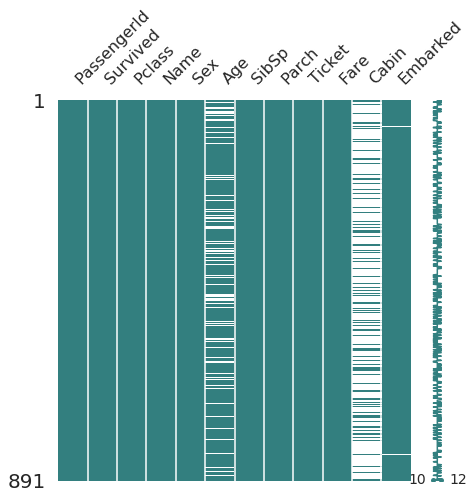

In [47]:
# Train set과 test set 모두 Age, Cabin, Embarked(Train만)에 null data 존재
# missingno 라이브러리를 활용한 null data 탐색
msno.matrix(df=df_train.iloc[:,:], figsize=(7,7), color=(0.2, 0.5, 0.5))

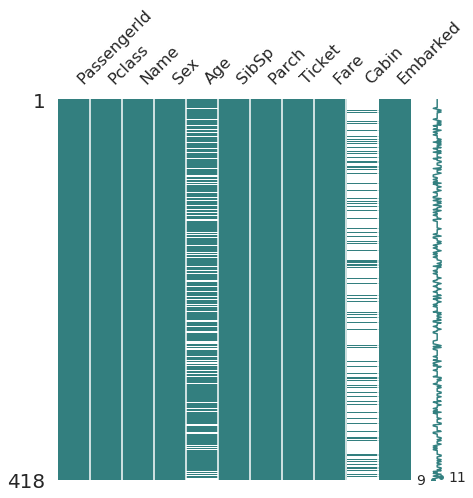

In [50]:
msno.matrix(df=df_test.iloc[:,:], figsize=(7,7), color=(0.2, 0.5, 0.5))

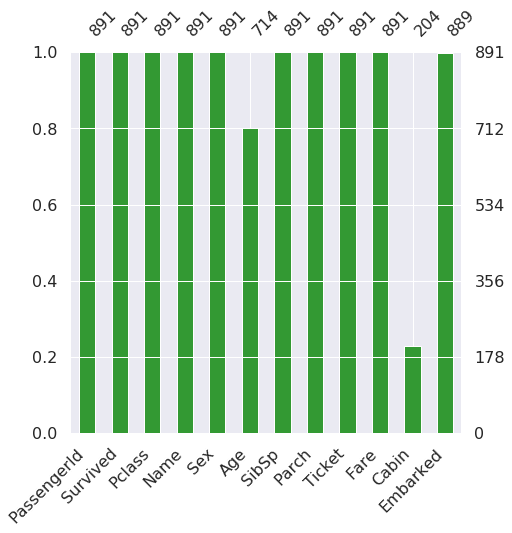

In [49]:
# missingno 라이브러리 활용한 null data 탐색 2
msno.bar(df=df_train.iloc[:,:], figsize=(7,7), color=(0.2,0.6,0.2))

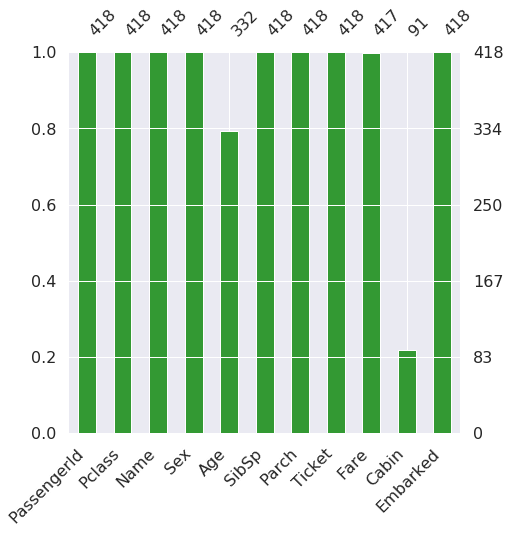

In [51]:
msno.bar(df=df_test.iloc[:,:], figsize=(7,7), color=(0.2,0.6,0.2))